In [60]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [61]:
df=pd.read_csv('customer_churn_data.csv')
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,Male,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,Male,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,Female,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,Female,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,Male,32,69.01,Month-to-Month,NaN,2208.32,No,Yes


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   object 
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  703 non-null    object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   object 
dtypes: float64(2), int64(3), object(5)
memory usage: 78.3+ KB


In [63]:
df.isnull().sum()

CustomerID           0
Age                  0
Gender               0
Tenure               0
MonthlyCharges       0
ContractType         0
InternetService    297
TotalCharges         0
TechSupport          0
Churn                0
dtype: int64

In [64]:
df['InternetService']=df['InternetService'].fillna(df['InternetService'].mode()[0])

In [65]:
df['Gender']=df['Gender'].replace({'Female':0,'Male':1})
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,1,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,Yes
1,2,43,1,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,Yes
2,3,51,0,2,63.79,Month-to-Month,Fiber Optic,127.58,No,Yes
3,4,60,0,8,102.34,One-Year,DSL,818.72,Yes,Yes
4,5,42,1,32,69.01,Month-to-Month,Fiber Optic,2208.32,No,Yes


In [66]:
df['ContractType'].value_counts()

ContractType
Month-to-Month    511
One-Year          289
Two-Year          200
Name: count, dtype: int64

<Axes: xlabel='ContractType', ylabel='Churn'>

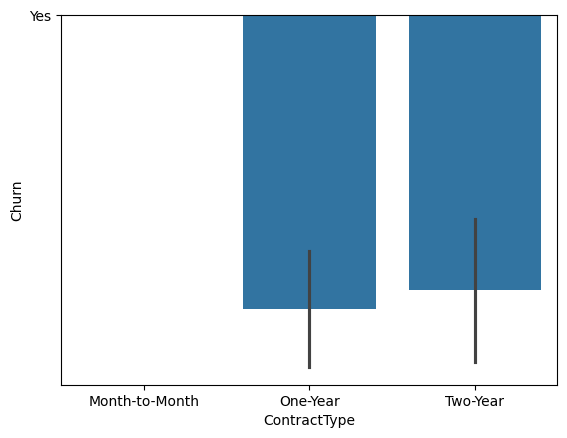

In [67]:
sns.barplot(x='ContractType',y='Churn',data=df)


In [68]:
df['Churn']=df['Churn'].replace({'No':0,'Yes':1})
df.head()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,1,49,1,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,1
1,2,43,1,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,1
2,3,51,0,2,63.79,Month-to-Month,Fiber Optic,127.58,No,1
3,4,60,0,8,102.34,One-Year,DSL,818.72,Yes,1
4,5,42,1,32,69.01,Month-to-Month,Fiber Optic,2208.32,No,1


In [69]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   CustomerID       1000 non-null   int64  
 1   Age              1000 non-null   int64  
 2   Gender           1000 non-null   int64  
 3   Tenure           1000 non-null   int64  
 4   MonthlyCharges   1000 non-null   float64
 5   ContractType     1000 non-null   object 
 6   InternetService  1000 non-null   object 
 7   TotalCharges     1000 non-null   float64
 8   TechSupport      1000 non-null   object 
 9   Churn            1000 non-null   int64  
dtypes: float64(2), int64(5), object(3)
memory usage: 78.3+ KB


In [70]:
df.describe()

,CustomerID,Age,Gender,Tenure,MonthlyCharges,TotalCharges,Churn
count,1000.000000,1000.000000,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,44.674000,0.462000,18.97300,74.391290,1404.364060,0.883000
std,288.819436,9.797741,0.498803,18.89257,25.712083,1571.755048,0.321581
min,1.000000,12.000000,0.000000,0.00000,30.000000,0.000000,0.000000
25%,250.750000,38.000000,0.000000,5.00000,52.357500,345.217500,1.000000
50%,500.500000,45.000000,0.000000,13.00000,74.060000,872.870000,1.000000
75%,750.250000,51.000000,1.000000,26.00000,96.102500,1900.175000,1.000000
max,1000.000000,83.000000,1.000000,122.00000,119.960000,12416.250000,1.000000


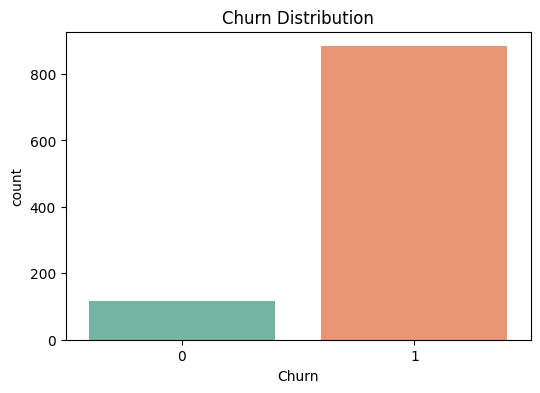

In [71]:
plt.figure(figsize=(6,4))
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Churn Distribution")
plt.show()

In [72]:
df=df.drop(['CustomerID'],axis=1)
df.head()

,Age,Gender,Tenure,MonthlyCharges,ContractType,InternetService,TotalCharges,TechSupport,Churn
0,49,1,4,88.35,Month-to-Month,Fiber Optic,353.40,Yes,1
1,43,1,0,36.67,Month-to-Month,Fiber Optic,0.00,Yes,1
2,51,0,2,63.79,Month-to-Month,Fiber Optic,127.58,No,1
3,60,0,8,102.34,One-Year,DSL,818.72,Yes,1
4,42,1,32,69.01,Month-to-Month,Fiber Optic,2208.32,No,1


<Axes: xlabel='MonthlyCharges', ylabel='Count'>

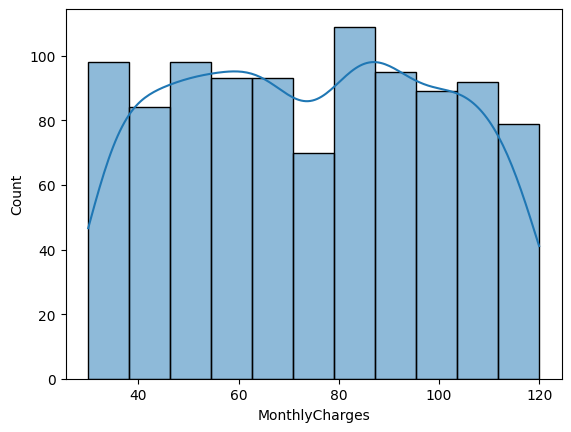

In [73]:
sns.histplot(df['MonthlyCharges'],kde=True)


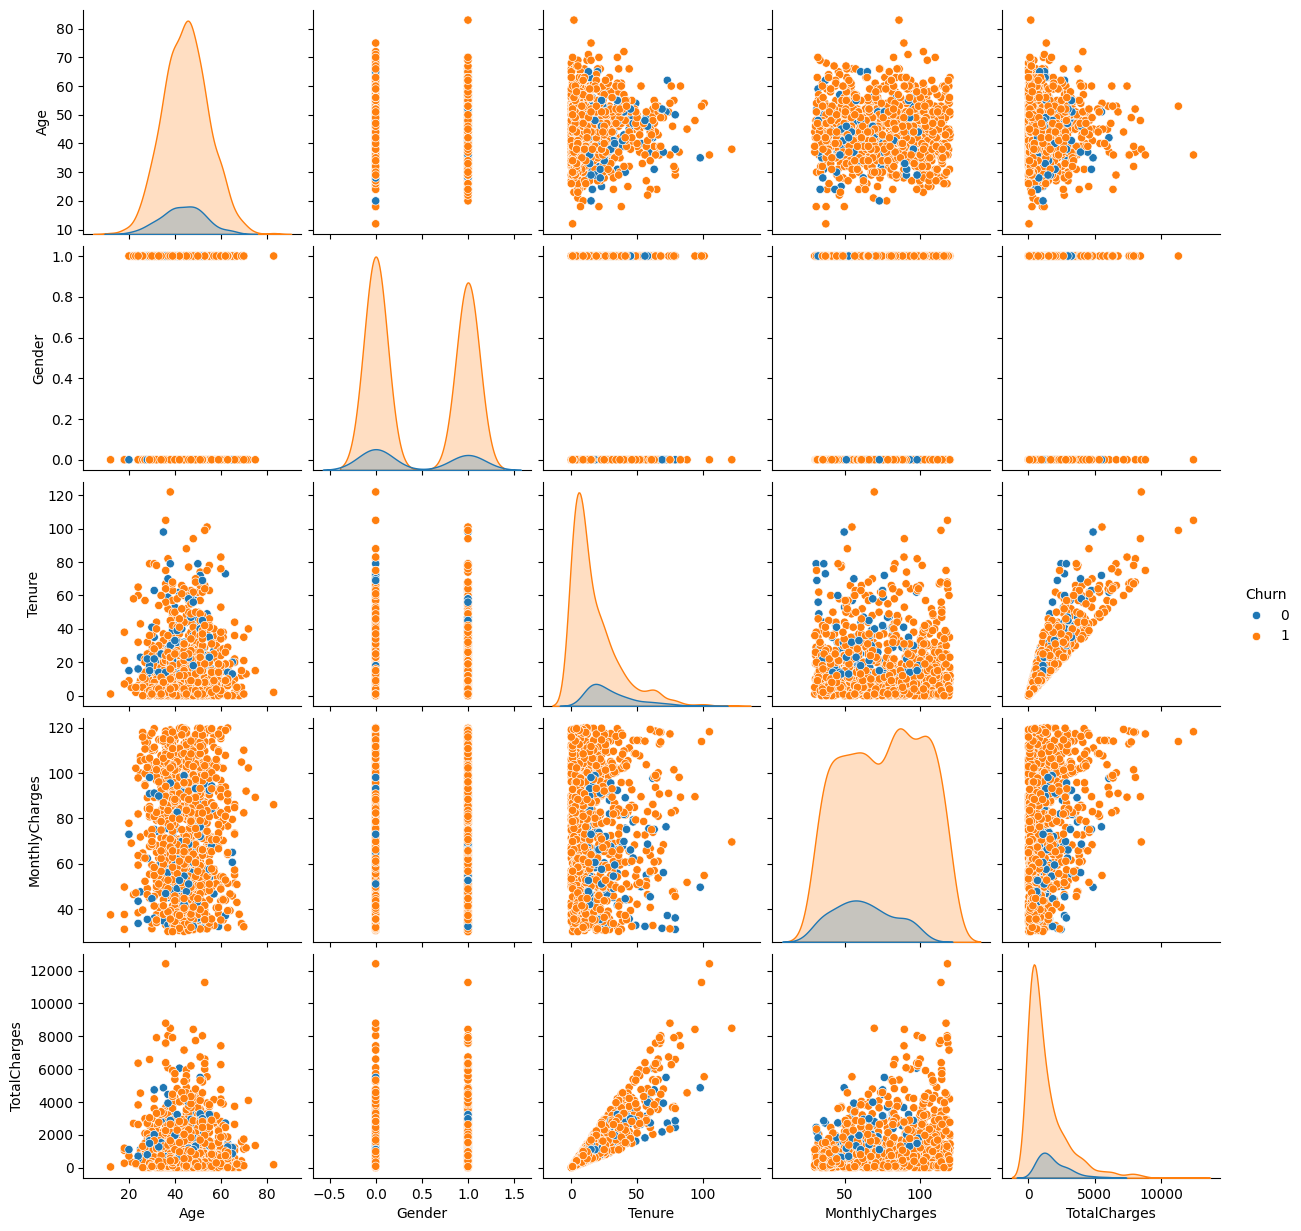

In [74]:
sns.pairplot(df,hue='Churn')

<Axes: xlabel='MonthlyCharges', ylabel='Count'>

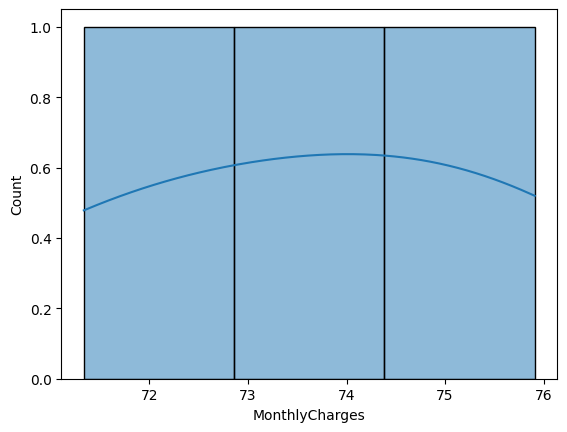

In [75]:
sns.histplot(df.groupby('ContractType')['MonthlyCharges'].mean(),kde=True)

In [76]:

categorical_cols = ['ContractType', 'InternetService', 'TechSupport']

df_encoded = pd.get_dummies(df, columns=categorical_cols, drop_first=True)

display(df_encoded.head())

,Age,Gender,Tenure,MonthlyCharges,TotalCharges,Churn,ContractType_One-Year,ContractType_Two-Year,InternetService_Fiber Optic,TechSupport_Yes
0,49,1,4,88.35,353.40,1,False,False,True,True
1,43,1,0,36.67,0.00,1,False,False,True,True
2,51,0,2,63.79,127.58,1,False,False,True,False
3,60,0,8,102.34,818.72,1,True,False,False,True
4,42,1,32,69.01,2208.32,1,False,False,True,False


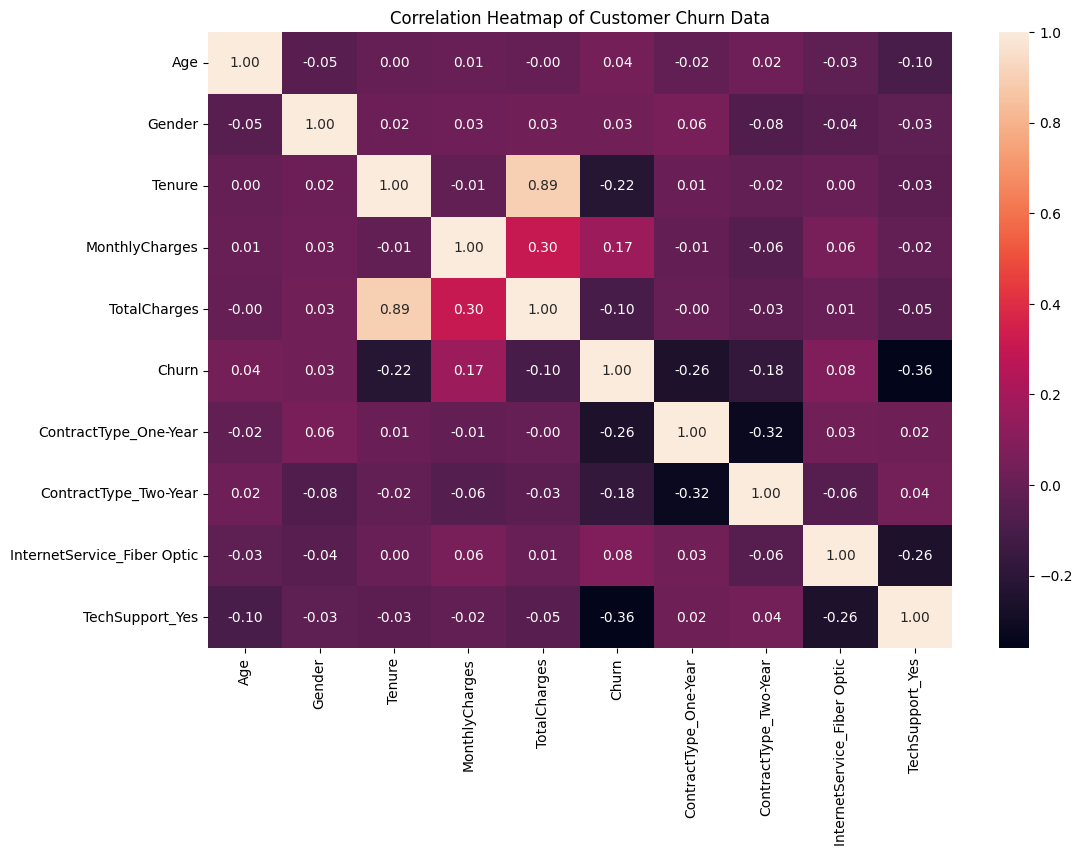

In [77]:
plt.figure(figsize=(12, 8))
sns.heatmap(df_encoded.corr(), annot=True, fmt=".2f")
plt.title('Correlation Heatmap of Customer Churn Data')
plt.show()

In [78]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import joblib

In [79]:
y = df_encoded['Churn'].astype(int) 
x=df_encoded.drop(['Churn'],axis=1)

In [80]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [81]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
x_train_res, y_train_res = smote.fit_resample(x_train, y_train)

print("Before SMOTE:", y_train.value_counts())
print("After SMOTE:", y_train_res.value_counts())

Before SMOTE: Churn
1    706
0     94
Name: count, dtype: int64
After SMOTE: Churn
0    706
1    706
Name: count, dtype: int64


In [82]:
scaler=StandardScaler()
x_train_scaled=scaler.fit_transform(x_train_res)
x_test_scaled=scaler.transform(x_test)

In [83]:
logreg=LogisticRegression()
logreg.fit(x_train_scaled,y_train_res)

,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [84]:
y_pred=logreg.predict(x_test_scaled)

In [85]:
accuracy_score(y_test,y_pred)

0.935

In [86]:
confusion_matrix(y_test,y_pred)

array([[ 21,   2],
       [ 11, 166]])

In [87]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.66      0.91      0.76        23\n           1       0.99      0.94      0.96       177\n\n    accuracy                           0.94       200\n   macro avg       0.82      0.93      0.86       200\nweighted avg       0.95      0.94      0.94       200\n'

In [88]:
from sklearn.neighbors import KNeighborsClassifier

param_grid={
    'n_neighbors':[3,5,7,9,11],
    'weights':['uniform','distance'],
    'p':[1,2]
}
knn=KNeighborsClassifier()
grid_search=GridSearchCV(knn,param_grid,cv=5)
grid_search.fit(x_train_scaled,y_train_res)


,estimator,KNeighborsClassifier()
,param_grid,"{'n_neighbors': [3, 5, ...], 'p': [1, 2], 'weights': ['uniform', 'distance']}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_neighbors,3


In [89]:
accuracy_score(y_test,grid_search.predict(x_test_scaled))

0.97

In [90]:
confusion_matrix(y_test,grid_search.predict(x_test_scaled))

array([[ 21,   2],
       [  4, 173]])

In [91]:
classification_report(y_test,grid_search.predict(x_test_scaled))

'              precision    recall  f1-score   support\n\n           0       0.84      0.91      0.88        23\n           1       0.99      0.98      0.98       177\n\n    accuracy                           0.97       200\n   macro avg       0.91      0.95      0.93       200\nweighted avg       0.97      0.97      0.97       200\n'

In [92]:
from sklearn.ensemble import RandomForestClassifier

param_grid={
    'n_estimators':[10,50,100,200],
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
}
rf=RandomForestClassifier()
grid_search=GridSearchCV(rf,param_grid,cv=5)
grid_search.fit(x_train_scaled,y_train_res)

,estimator,RandomForestClassifier()
,param_grid,"{'max_depth': [None, 10, ...], 'min_samples_split': [2, 5, ...], 'n_estimators': [10, 50, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,50


In [93]:
accuracy_score(y_test,grid_search.predict(x_test_scaled))

0.995

In [94]:
from sklearn.svm import SVC

param_grid={
    'C':[0.1,1,10,100],
    'kernel':['linear','rbf','poly'],
    'gamma':['scale','auto',0.1,1]
}
svm=SVC()
grid_search=GridSearchCV(svm,param_grid,cv=5)
grid_search.fit(x_train_scaled,y_train_res)

,estimator,SVC()
,param_grid,"{'C': [0.1, 1, ...], 'gamma': ['scale', 'auto', ...], 'kernel': ['linear', 'rbf', ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,C,100


In [95]:
accuracy_score(y_test,grid_search.predict(x_test_scaled))

0.965

In [96]:
classification_report(y_test,grid_search.predict(x_test_scaled))

'              precision    recall  f1-score   support\n\n           0       0.81      0.91      0.86        23\n           1       0.99      0.97      0.98       177\n\n    accuracy                           0.96       200\n   macro avg       0.90      0.94      0.92       200\nweighted avg       0.97      0.96      0.97       200\n'

In [97]:
from sklearn.tree import DecisionTreeClassifier
param_grid={
    'max_depth':[None,10,20,30],
    'min_samples_split':[2,5,10],
    'criterion':['gini','entropy']
}
dt=DecisionTreeClassifier()
grid_search=GridSearchCV(dt,param_grid,cv=5)
grid_search.fit(x_train_scaled,y_train_res)

,estimator,DecisionTreeClassifier()
,param_grid,"{'criterion': ['gini', 'entropy'], 'max_depth': [None, 10, ...], 'min_samples_split': [2, 5, ...]}"
,scoring,None
,n_jobs,None
,refit,True
,cv,5
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,criterion,'gini'


In [98]:
accuracy_score(y_test,grid_search.predict(x_test_scaled))

0.995

In [99]:
classification_report(y_test,grid_search.predict(x_test_scaled))

'              precision    recall  f1-score   support\n\n           0       0.96      1.00      0.98        23\n           1       1.00      0.99      1.00       177\n\n    accuracy                           0.99       200\n   macro avg       0.98      1.00      0.99       200\nweighted avg       1.00      0.99      1.00       200\n'

In [106]:
print(x_train_scaled)

[[-0.25986504  1.38905024  2.00729788 ...  1.26127939  0.61336639
   0.62102514]
 [ 0.07998933 -0.71991636 -0.16093589 ... -0.79284575  0.61336639
   0.62102514]
 [-0.37314983  1.38905024  0.42078537 ... -0.79284575  0.61336639
   0.62102514]
 ...
 [ 0.07998933 -0.71991636 -0.53112214 ... -0.79284575  0.61336639
   0.62102514]
 [-1.39271294 -0.71991636 -0.10805214 ...  1.26127939  0.61336639
   0.62102514]
 [ 2.00583077 -0.71991636 -0.63688964 ...  1.26127939  0.61336639
   0.62102514]]


In [107]:
x.columns.tolist()

['Age',
 'Gender',
 'Tenure',
 'MonthlyCharges',
 'TotalCharges',
 'ContractType_One-Year',
 'ContractType_Two-Year',
 'InternetService_Fiber Optic',
 'TechSupport_Yes']

In [ ]:
joblib.dump(scaler, "scaler.pkl")
joblib.dump(grid_search.best_estimator_, "model.pkl")